<a href="https://colab.research.google.com/github/KKseniaK/myPortfolio/blob/main/Neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Регрессионный анализ
— это набор статистических методов оценки отношений между переменными. Его можно использовать для оценки степени взаимосвязи между переменными и для моделирования будущей зависимости.

В контексте машинного обучения линейная регрессия относится к разделу обучения с учителем **(supervised learning)**, то есть когда явно прослеживается связь между вводом и выводом и предсказывается некое значение по ограниченному количеству примеров (на которых, как ученик, обучается алгоритм).

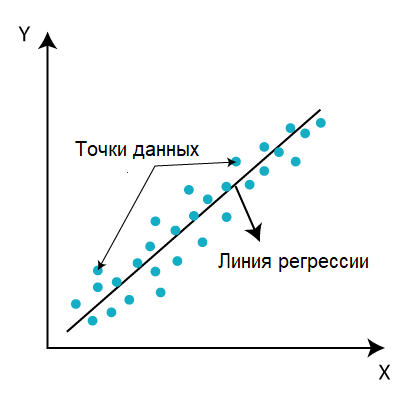

# Architecture of a neural network regression model

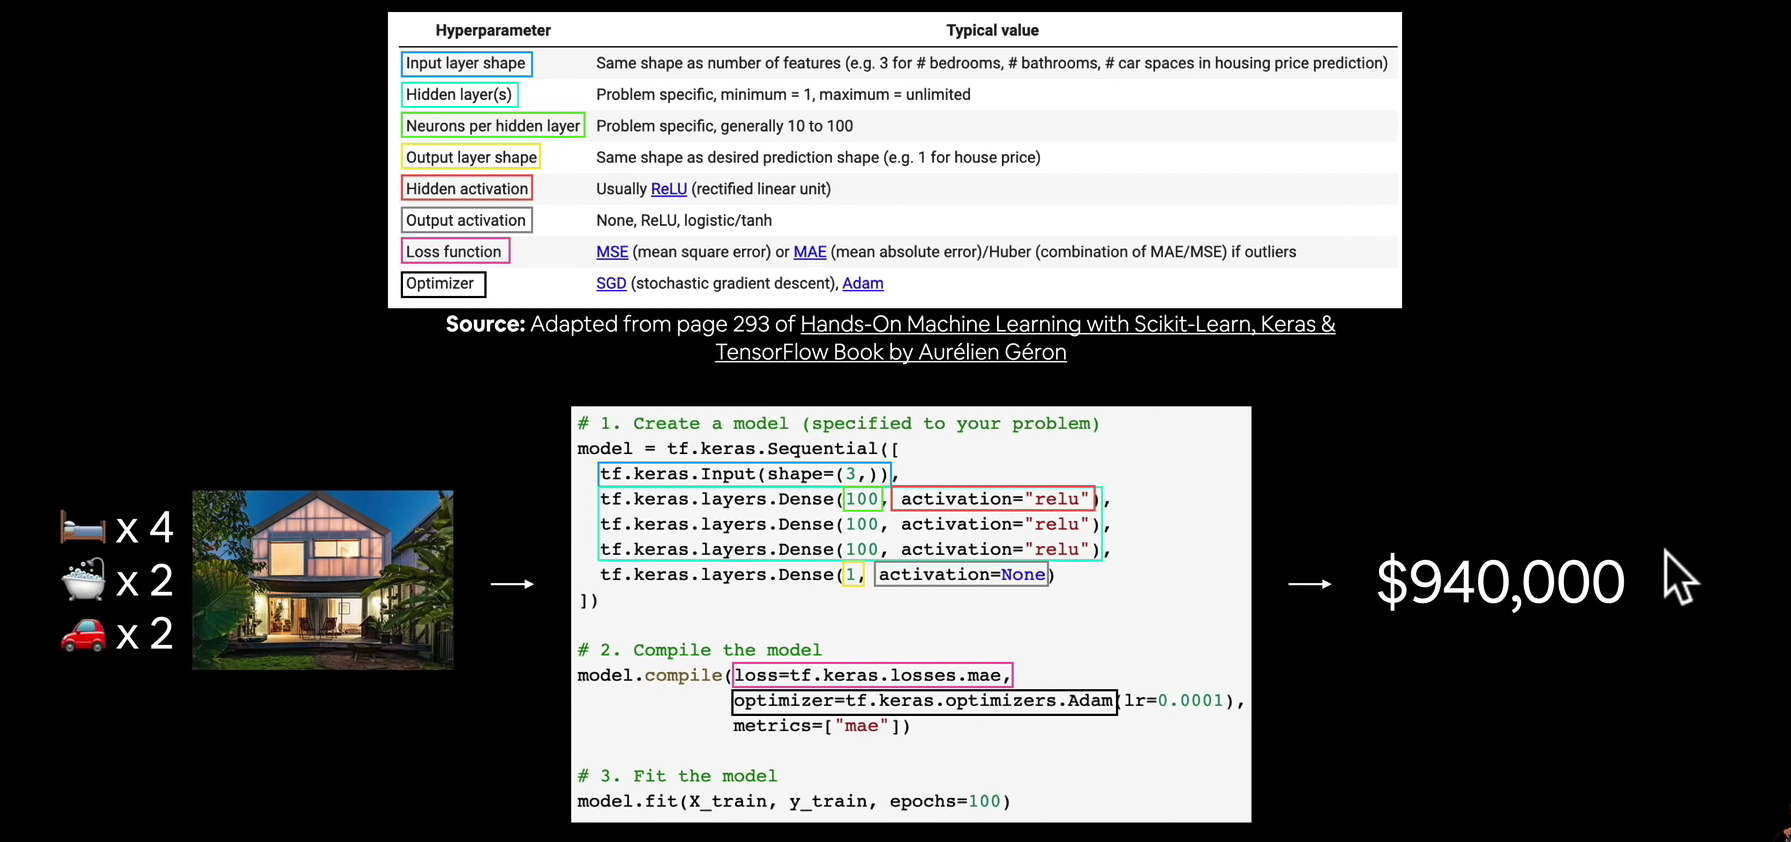

*If you were working on building a machine learning algorithm for predicting housing prices, your inputs may be number of bedrooms, number of bathrooms and number of garages, giving you an input shape of 3 (3 different features). And since you're trying to predict the price of the house, your output shape would be 1*

>🔑 **Note**: A **hyperparameter** in machine learning is something a data analyst or developer can set themselves, where as a parameter usually describes something a model learns on its own (a value not explicitly set by an analyst).

In [ ]:
import tensorflow as tf
print(tf.__version__) # check the version (should be 2.x+)

import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

2.13.0
Notebook last run (end-to-end): 2023-10-03 19:56:12.123047


# Creating data to view and fit

Since we're working on a **regression problem** (predicting a number) let's create some linear data (a straight line) to model.

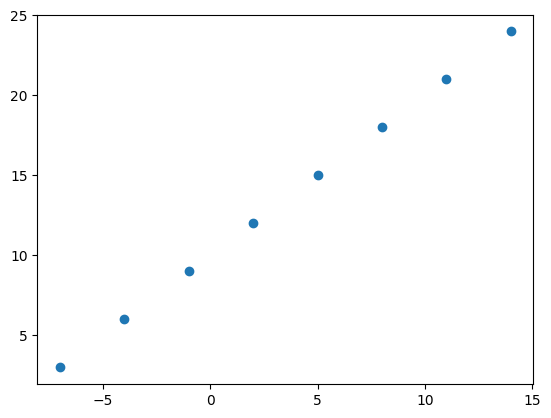

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

# Regression input shapes and output shapes
One of the most important concepts when working with neural networks are the input and output shapes.

**The input shape** is the shape of your data that goes into the model.

**The output shape** is the shape of your data you want to come out of your model.

These will differ depending on the problem you're working on.

Neural networks accept numbers and output numbers. These numbers are typically represented as tensors (or arrays).

Before, we created data using NumPy arrays, but we could do the same with tensors.

In [ ]:
# Example input and output shapes of a regression model
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

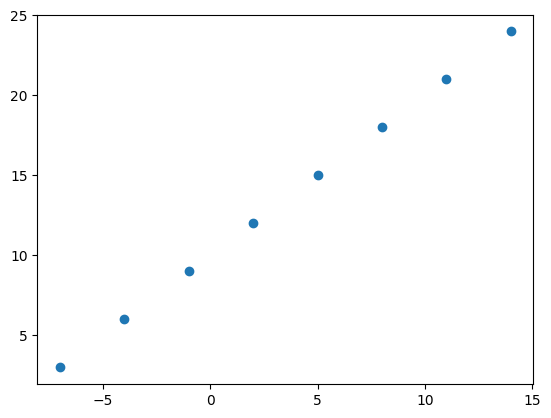

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features (using tensors)
X = tf.constant([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels (using tensors)
y = tf.constant([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);


Our goal here will be to use **X** to predict **y**.

So our `input` will be **X** and our `output` will be **y**.

Let's take a look.

In [ ]:
# Take a single example of X
input_shape = X[0].shape

# Take a single example of y
output_shape = y[0].shape

input_shape, output_shape # these are both scalars (no shape)

(TensorShape([]), TensorShape([]))

In [ ]:
# Let's take a look at the single examples invidually
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-7.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=3.0>)

In our case, we're trying to build a model to predict the pattern between **X[0]** equalling **-7.0** and **y[0]** equalling **3.0**.

So now we get our answer, we're trying to use **1 X** value to predict **1 y** value.

In fact, they're probably two of the things you'll spend the most time on when you work with neural networks: **making sure your input and outputs are in the correct shape**

# Steps in modelling with TensorFlow
In TensorFlow, there are typically 3 fundamental steps to creating and training a model.

1. **Creating a model** - piece together the layers of a neural network yourself (using the Functional or Sequential API) or import a previously built model (known as transfer learning).
2. **Compiling a model** - defining how a models performance should be measured (loss/metrics) as well as defining how it should improve (optimizer).
3. **Fitting a model** - letting the model try to find patterns in the data (how does X get to y).

Let's see these in action using the *Keras Sequential API* to build a model for our regression data. And then we'll step through each

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # SGD is short for stochastic gradient descent
              metrics=["mae"])

# Fit the model
# model.fit(X, y, epochs=5) # this will break with TensorFlow 2.7.0+
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 385ms/step - loss: 14.0776 - mae: 14.0776
Epoch 2/5
1/1 [==============================] - 0s 7ms/step - loss: 13.9451 - mae: 13.9451
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 13.8126 - mae: 13.8126
Epoch 4/5
1/1 [==============================] - 0s 8ms/step - loss: 13.6801 - mae: 13.6801
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 13.5476 - mae: 13.5476


In [ ]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Make a prediction with the model
model.predict([17.0])

1/1 [==============================] - 0s 74ms/step


array([[0.2194108]], dtype=float32)

It doesn't go very well... it should've output something close to 27.0.

> 🤔 **Question**: What's Keras? I thought we were working with TensorFlow but every time we write TensorFlow code, keras comes after tf (e.g. `tf.keras.layers.Dense()`)?

> Before `TensorFlow 2.0+`,` Keras` was an API designed to be able to build deep learning models with ease. Since `TensorFlow 2.0+`, its functionality has been tightly integrated within the TensorFlow library.

# Improving a model
To improve our model, we alter almost every part of the 3 steps we went through before.

1. **Creating a model** - here you might want to add more layers, increase the number of hidden units (also called neurons) within each layer, change the activation functions of each layer.
2. **Compiling a model** - you might want to choose optimization function or perhaps change the learning rate of the optimization function.
3. **Fitting a model** - perhaps you could fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from)

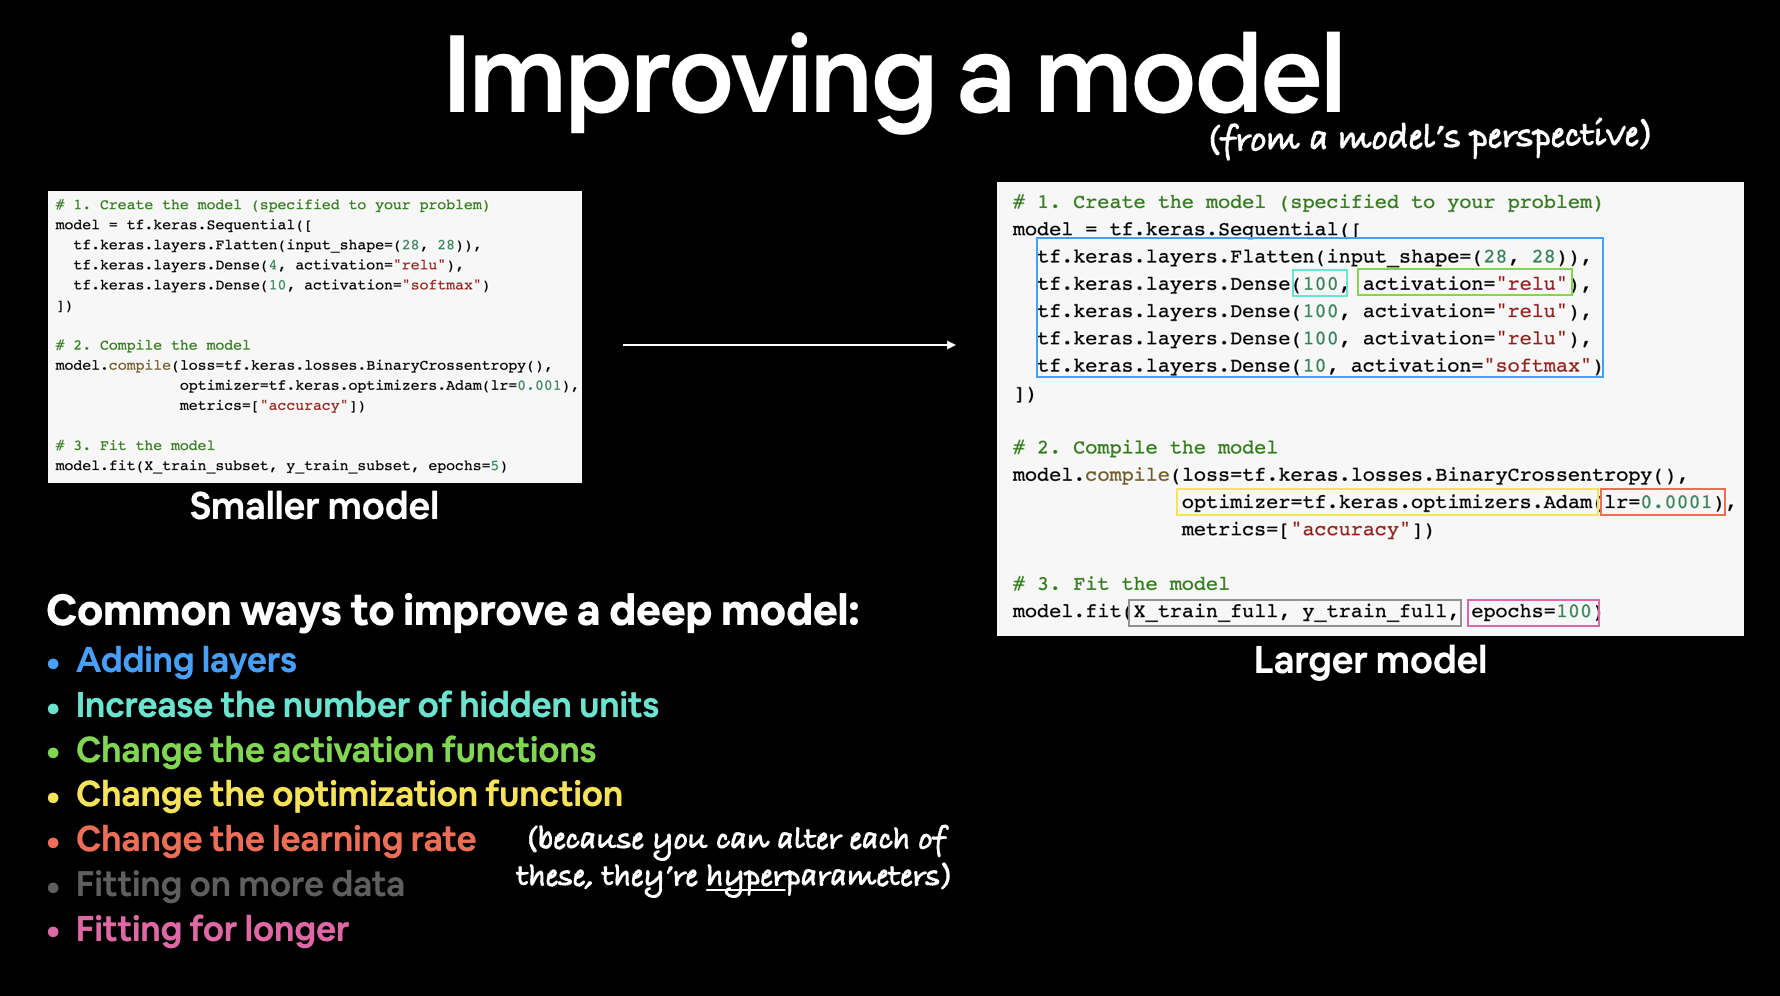

For now, let's keep it simple, all we'll do is **train our model for longer** (everything else will stay the same).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 233ms/step - loss: 15.7470 - mae: 15.7470
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 15.4658 - mae: 15.4658
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 15.1845 - mae: 15.1845
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 14.9243 - mae: 14.9243
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 14.7918 - mae: 14.7918
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 14.6593 - mae: 14.6593
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 14.5268 - mae: 14.5268
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.3943 - mae: 14.3943
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 14.2618 - mae: 14.2618
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 14.1293 - mae: 14.1293
Epoch 11/100
1/1 [==============================] - 0s 7

How about we try predict on 17.0 again?

In [ ]:
# Remind ourselves of what X and y are
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 44ms/step


array([[29.572794]], dtype=float32)

Much better!

**Making more layers**

In [ ]:
import tensorflow as tf
import numpy as np
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['mae'])

# Fit model (this time we'll train for longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=300)

Epoch 1/300
1/1 [==============================] - 1s 528ms/step - loss: 13.3992 - mae: 13.3992
Epoch 2/300
1/1 [==============================] - 0s 8ms/step - loss: 13.0371 - mae: 13.0371
Epoch 3/300
1/1 [==============================] - 0s 10ms/step - loss: 12.6751 - mae: 12.6751
Epoch 4/300
1/1 [==============================] - 0s 8ms/step - loss: 12.3128 - mae: 12.3128
Epoch 5/300
1/1 [==============================] - 0s 8ms/step - loss: 11.9501 - mae: 11.9501
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 11.5864 - mae: 11.5864
Epoch 7/300
1/1 [==============================] - 0s 9ms/step - loss: 11.2213 - mae: 11.2213
Epoch 8/300
1/1 [==============================] - 0s 7ms/step - loss: 10.8545 - mae: 10.8545
Epoch 9/300
1/1 [==============================] - 0s 6ms/step - loss: 10.4855 - mae: 10.4855
Epoch 10/300
1/1 [==============================] - 0s 9ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/300
1/1 [==============================] - 0s 

In [ ]:
# Try and predict what y would be if X was 17.0
model.predict([17.0]) # the right answer is 27.0 (y = X + 10)

1/1 [==============================] - 0s 250ms/step


array([[27.527884]], dtype=float32)

# Evaluating a model

A typical workflow you'll go through when building neural networks is:

> `Build a model -> evaluate it -> build (tweak) a model -> evaulate it -> build (tweak) a model -> evaluate it...`


### Visualize, visualize, visualize

When it comes to evaluation, you'll want to remember the words: "visualize, visualize, visualize."

This is because you're probably better looking at something (doing) than you are thinking about something.

It's a good idea to visualize:

* **The data** - what data are you working with? What does it look like?
* **The model itself** - what does the architecture look like? What are the different shapes?
* **The training of a model** - how does a model perform while it learns?
* **The predictions of a model** - how do the predictions of a model line up against the ground truth (the original labels)?


Let's start by visualizing the model.

But first, we'll **create a little bit of a bigger dataset** and a new model we can use (it'll be the same as before, but the more practice the better).

In [ ]:
# Make a bigger dataset
X = np.arange(-100, 100, 4)
X

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])

In [ ]:
# Make labels for the dataset (adhering to the same pattern as before)
y = np.arange(-90, 110, 4)
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

Since `y = X + 10`, we could make the labels like so:

In [ ]:
# Same result as above
y = X + 10
y

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

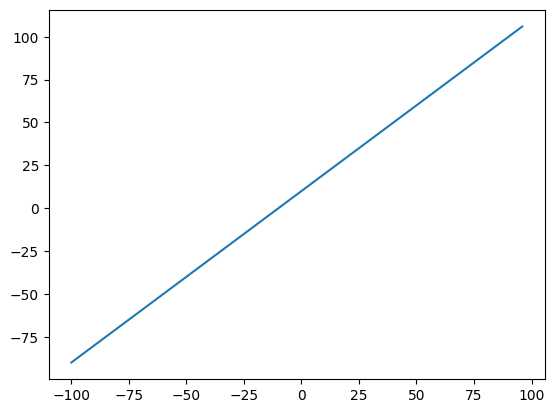

In [ ]:
import matplotlib.pyplot as plt

plt.plot(X, y)

# Split data into training/test set

One of the other most common and important steps in a machine learning project is creating a training and test set (and when required, a validation set)

Each set serves a specific purpose:

* **Training set** - the model learns from this data, which is typically 70-80% of the total data available (like the course materials you study during the semester).
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the total data available (like the practice exam you take before the final exam).
* **Test set** - the model gets evaluated on this data to test what it has learned, it's typically 10-15% of the total data available (like the final exam you take at the end of the semester).

For now, we'll just use a training and test set, this means we'll have a dataset for our model to learn on as well as be evaluated on.

We can create them by splitting our X and y arrays

> 🔑 **Note:** When dealing with real-world data, this step is typically done right at the start of a project (the test set should always be kept separate from all other data). We want our model to learn on training data and then evaluate it on test data to get an indication of how well it generalizes to unseen examples.

In [ ]:
# Check how many samples we have
len(X)

50

In [ ]:
# Split data into train and test sets
X_train = X[:40] # first 40 examples (80% of data)
y_train = y[:40]

X_test = X[40:] # last 10 examples (20% of data)
y_test = y[40:]

len(X_train), len(X_test)

(40, 10)

# Visualizing the data
Now we've got our training and test data, it's a good idea to visualize it.

Let's plot it with some nice colours to differentiate what's what.

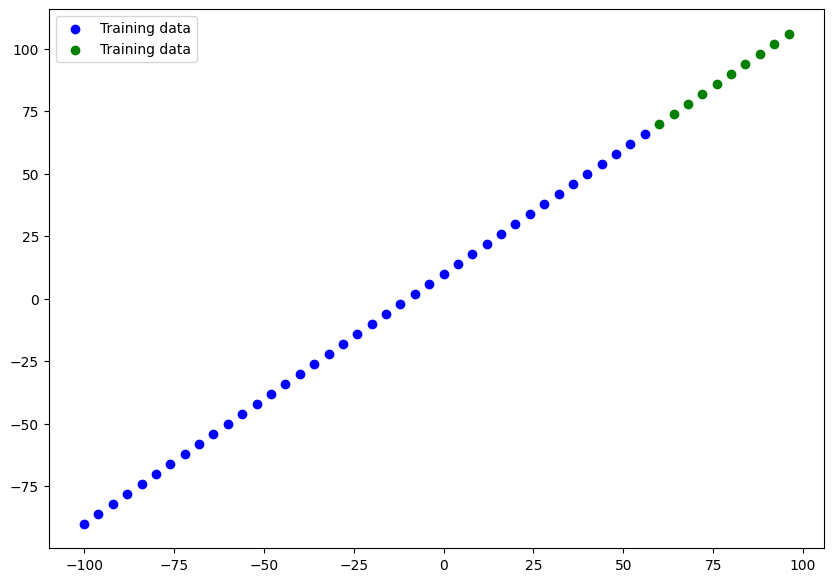

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c='b', label='Training data')
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label='Training data')
# Show the legend
plt.legend();

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# Fit model (same as above)
#model.fit(X_train, y_train, epochs=100) # commented out on purpose (not fitting it just yet)

# Visualizing the model

We can let our model know the input shape of our data using the input_shape parameter to the first layer (usually if input_shape isn't defined, Keras tries to figure it out automatically).

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, input_shape=[1]) # define the input_shape to our model
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
# This will work after specifying the input shape
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* **Total params** - total number of parameters in the model.
* **Trainable parameters** - these are the parameters (patterns) the model can update as it trains.
* **Non-trainable parameters** - these parameters aren't updated during training (this is typical when you bring in the already learned patterns from other models during transfer learning).

In [ ]:
# Fit the model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0) # verbose controls how much gets output

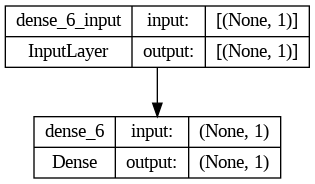

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

# Visualizing the predictions
To visualize predictions, it's always a good idea to plot them against the ground truth labels

In [ ]:
# Make predictions
y_preds = model.predict(X_test)

1/1 [==============================] - 0s 19ms/step


In [ ]:
# View the predictions
y_preds

array([[44.52407 ],
       [47.40526 ],
       [50.286446],
       [53.167633],
       [56.04882 ],
       [58.930008],
       [61.811195],
       [64.69238 ],
       [67.57357 ],
       [70.454765]], dtype=float32)

Let's build a plotting function to find out.
> 🔑 **Note:** If you think you're going to be visualizing something a lot, it's a good idea to functionize it so you can use it later.

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_preds):
  """
  Plots training data, test data and compares predictions.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # Plot test data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot the predictions in red (predictions were made on the test data)
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend();

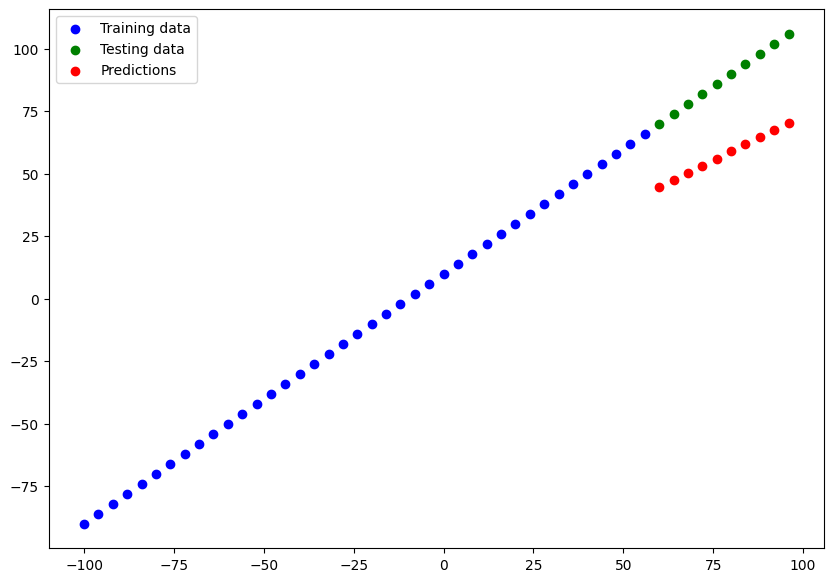

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_preds)

# Evaluating predictions
Alongisde visualizations, evaulation metrics are your alternative best option for evaluating your model.

Depending on the problem you're working on, different models have different evaluation metrics.

Two of the main metrics used for regression problems are:

* **Mean absolute error (MAE)** - the mean difference between each of the predictions.
* **Mean squared error (MSE)** - the squared mean difference between of the predictions (use if larger errors are more detrimental than smaller errors).

The lower each of these values, the better.

You can also use `model.evaluate()` which will return the loss of the model as well as any metrics setup during the compile step.

In [ ]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 220ms/step - loss: 30.5106 - mae: 30.5106


[30.510583877563477, 30.510583877563477]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([43.47593 , 40.59474 , 37.713554, 34.832367, 31.951178, 29.069992,
       26.188807, 23.307617, 20.42643 , 17.636189], dtype=float32)>

This is because our `y_test` and `y_preds` tensors are different shapes.

In [ ]:
# Check the test label tensor values
y_test

array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])

In [ ]:
# Check the predictions tensor values (notice the extra square brackets)
y_preds

array([[44.52407 ],
       [47.40526 ],
       [50.286446],
       [53.167633],
       [56.04882 ],
       [58.930008],
       [61.811195],
       [64.69238 ],
       [67.57357 ],
       [70.454765]], dtype=float32)

In [ ]:
# Check the tensor shapes
y_test.shape, y_preds.shape

((10,), (10, 1))

We can fix it using `squeeze()`, it'll remove the the 1 dimension from our `y_preds` tensor, making it the same shape as `y_test`

> **🔑 Note**: If you're comparing two tensors, it's important to make sure they're the right shape(s) (you won't always have to manipulate the shapes, but always be on the look out, many errors are the result of mismatched tensors, especially mismatched input and output shapes).

In [ ]:
# Shape before squeeze()
y_preds.shape

(10, 1)

In [ ]:
# Shape after squeeze()
y_preds.squeeze().shape

(10,)

In [ ]:
# What do they look like?
y_test, y_preds.squeeze()

(array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106]),
 array([44.52407 , 47.40526 , 50.286446, 53.167633, 56.04882 , 58.930008,
        61.811195, 64.69238 , 67.57357 , 70.454765], dtype=float32))

In [ ]:
# Calcuate the MAE
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_preds.squeeze()) # use squeeze() to make same shape
mae

<tf.Tensor: shape=(), dtype=float32, numpy=30.510584>

In [ ]:
# Calculate the MSE
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=y_preds.squeeze())
mse

<tf.Tensor: shape=(), dtype=float32, numpy=941.22266>

We can also calculate the MAE using pure TensorFlow functions.

In [ ]:
# Returns the same as tf.metrics.mean_absolute_error()
tf.reduce_mean(tf.abs(y_test-y_preds.squeeze()))

<tf.Tensor: shape=(), dtype=float64, numpy=30.510585021972656>

Again, it's a good idea to **functionize anything you think you might use over again** (or find yourself using over and over again).

Let's make functions for our evaluation metrics.

In [ ]:
def mae(y_test, y_pred):
  """
  Calculuates mean absolute error between y_test and y_preds.
  """
  return tf.metrics.mean_absolute_error(y_test,
                                        y_pred)

def mse(y_test, y_pred):
  """
  Calculates mean squared error between y_test and y_preds.
  """
  return tf.metrics.mean_squared_error(y_test,
                                       y_pred)

# Running experiments to improve a model

Again, there are many different ways you can do this, but 3 of the main ones are:

* **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
* **Make your model larger** (use a more complex model) - this might come in the form of more layers or more hidden units in each layer.
* **Train for longer** - give your model more of a chance to find the patterns in the data.

To do so, we'll build 3 models and compare their results:

* `model_1` - same as original model, 1 layer, trained for 100 epochs.
* `model_2` - 2 layers, trained for 100 epochs.
* `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 101.6553 - mae: 101.6553
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 66.1999 - mae: 66.1999
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 28.9288 - mae: 28.9288
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 10.4412 - mae: 10.4412
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 11.4783 - mae: 11.4783
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 10.5877 - mae: 10.5877
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 9.5427 - mae: 9.5427
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0417 - mae: 9.0417
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 17.7620 - mae: 17.7620
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 9.5853 - mae: 9.5853
Epoch 11/100
2/2 [==============================] - 0s 6ms/step

1/1 [==============================] - 0s 37ms/step


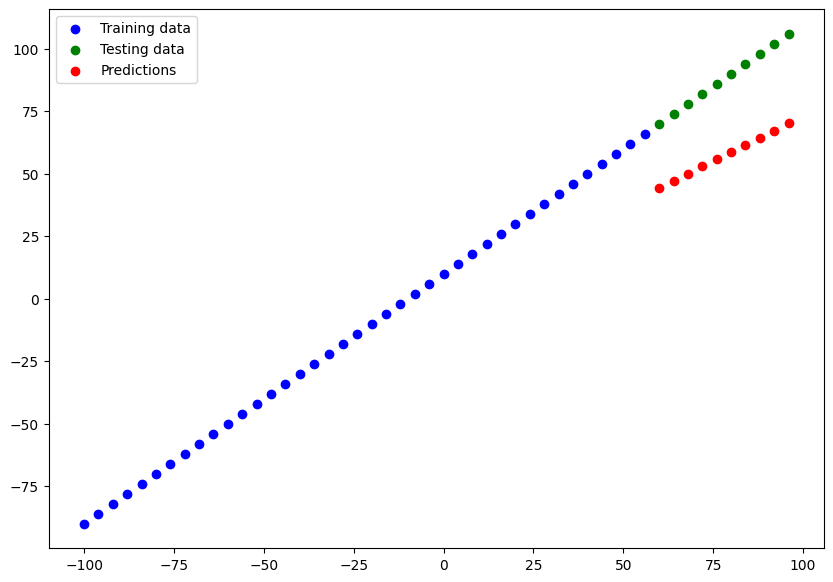

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 metrics
mae_1 = mae(y_test, y_preds_1.squeeze()).numpy()
mse_1 = mse(y_test, y_preds_1.squeeze()).numpy()
mae_1, mse_1

(30.745855, 955.813)

**Build `model_2`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 9ms/step - loss: 21.2396 - mae: 21.2396
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4395 - mae: 9.4395
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 18.8441 - mae: 18.8441
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0782 - mae: 11.0782
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 11.8643 - mae: 11.8643
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.6994 - mae: 9.6994
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 10.5713 - mae: 10.5713
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 10.8246 - mae: 10.8246
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 37.6082 - mae: 37.6082
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 25.2570 - mae: 25.2570
Epoch 11/100
2/2 [==============================] - 0s 5ms/step

1/1 [==============================] - 0s 139ms/step


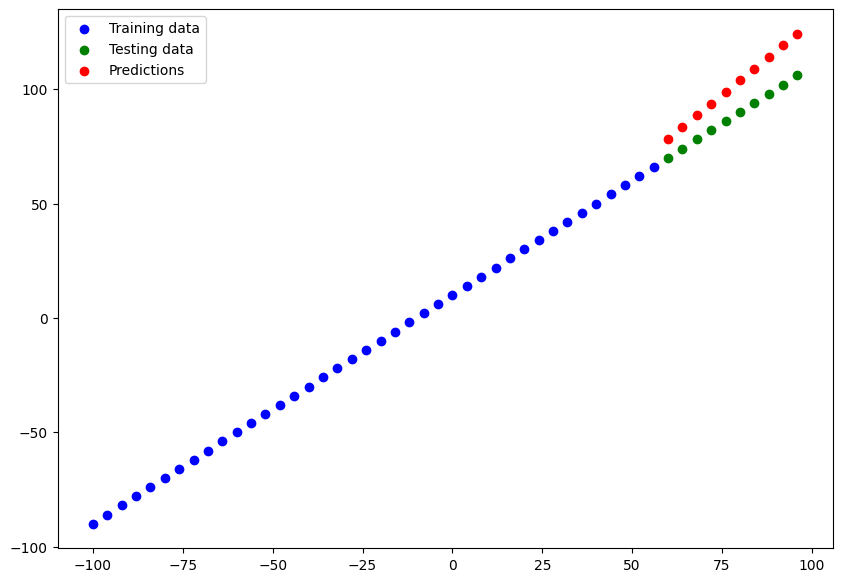

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 metrics
mae_2 = mae(y_test, y_preds_2.squeeze()).numpy()
mse_2 = mse(y_test, y_preds_2.squeeze()).numpy()
mae_2, mse_2

(13.242071, 185.34196)

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_`2 except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 15ms/step


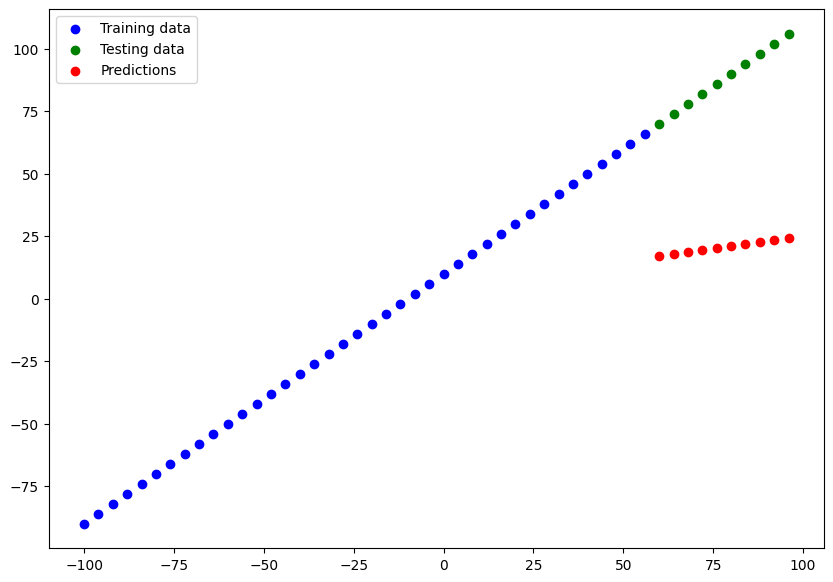

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

Strange, we trained for longer but our model performed worse?

As it turns out, our model might've trained too long and has thus resulted in worse results (we'll see ways to prevent training for too long later on).

In [ ]:
# Calculate model_3 metrics
mae_3 = mae(y_test, y_preds_3.squeeze()).numpy()
mse_3 = mse(y_test, y_preds_3.squeeze()).numpy()
mae_3, mse_3

(67.3069, 4613.004)

# Comparing results

In [ ]:
model_results = [["model_1", mae_1, mse_1],
                 ["model_2", mae_2, mse_2],
                 ["model_3", mae_3, mae_3]]

In [ ]:
import pandas as pd
all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,30.745855,955.812988
1,model_2,13.242071,185.341965
2,model_3,67.306900,67.306900


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practitioner's motto: "experiment, experiment, experiment".

> 📖 **Resource:** But as you build more models, you'll want to look into using tools such as:

* https://tensorboard.dev/ - a component of the TensorFlow library to help track modelling experiments (we'll see this later).
* https://www.wandb.com/ - a tool for tracking all kinds of machine learning experiments (the good news for Weights & Biases is it plugs into TensorBoard).

# Saving a model
You can save a TensorFlow/Keras model using `model.save()`.

There are two ways to save a model in TensorFlow:

1. The `SavedModel` format (default).
2. The `HDF5` format.

The main difference between the two is the `SavedModel` is automatically able to save custom objects (such as special layers) without additional modifications when loading the model back in.

In [ ]:
# Save a model using the SavedModel format
model_2.save('best_model_SavedModel_format')

In [ ]:
# Check it out - outputs a protobuf binary file (.pb) as well as other files
!ls best_model_SavedModel_format

assets	fingerprint.pb	keras_metadata.pb  saved_model.pb  variables


Now let's save the model in the HDF5 format, we'll use the same method but with a different filename.

In [ ]:
# Save a model using the HDF5 format
model_2.save("best_model_HDF5_format.h5") # note the addition of '.h5' on the end

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Check it out
!ls best_model_HDF5_format.h5

best_model_HDF5_format.h5


# Loading a model

We can load a saved model using the `load_model()` method.

Loading a model for the different formats (SavedModel and HDF5) is the same (as long as the pathnames to the particular formats are correct).

In [ ]:
# Load a model from the SavedModel format
loaded_saved_model = tf.keras.models.load_model("best_model_SavedModel_format")
loaded_saved_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 with the SavedModel version (should return True)
model_2_preds = model_2.predict(X_test)
saved_model_preds = loaded_saved_model.predict(X_test)
mae(y_test, saved_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 37ms/step


True

Loading in from the HDF5 is much the same

In [ ]:
# Load a model from the HDF5 format
loaded_h5_model = tf.keras.models.load_model("best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 1)                 2         
                                                                 
 dense_15 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4 (16.00 Byte)
Trainable params: 4 (16.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 with the loaded HDF5 version (should return True)
h5_model_preds = loaded_h5_model.predict(X_test)
mae(y_test, h5_model_preds.squeeze()).numpy() == mae(y_test, model_2_preds.squeeze()).numpy()

1/1 [==============================] - 0s 39ms/step


True

# Downloading a model (from Google Colab)

Say you wanted to get your model from Google Colab to your local machine, you can do one of the following things:

* Right click on the file in the files pane and click 'download'.
* Use the code below.

In [ ]:
# Download the model (or any file) from Google Colab
from google.colab import files
files.download("best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>